In [62]:
import nltk
import numpy as np
import csv
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from textblob import TextBlob
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [60]:
stop_words = set(stopwords.words("english"))

In [61]:
data = pd.read_csv('JLAllPages.csv')
print ("Original 'JLAllPages.csv' CSV Data: \n")
data

Original 'JLAllPages.csv' CSV Data: 



,Review,Name,Date
0,I am currently a plusnet broadband customer wh...,"""Lucy""","""1 month ago"""
1,Avoid. Avoid. Avoid. First John Lewis Broadban...,"""BJ""","""7 months ago"""
2,They've taken my money and won't refund. I can...,"""Nic""","""7 months ago"""
3,I ordered broadband with telephone for a recen...,"""David7667""","""1 year ago"""
4,Poor internet phone line went down a few times,"""clifford""","""1 year ago"""
5,I ordered broadband 5 weeks ago still not hear...,"""Ken""","""1 year ago"""
6,Have waited 3 weeks since I applied for John L...,"""Shirley chandler""","""1 year ago"""
7,If I could give zero or negative ratings I wou...,"""Moe""","""1 year ago"""
8,John Lewis broadband deserve a positive review...,"""Christopher J""","""2 years ago"""
9,Avoid. Avoid. Avoid.\n\nThe worst broadband qu...,"""Mart""","""2 years ago"""


In [50]:
comments = []
with open ("JLAllPages.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        comments.append(row)
        print (row)

['Review', ' Name', ' Date']
['I am currently a plusnet broadband customer which I am happy to continue using. However as my contract has now ended and plusnet will not give me the new customer" cashback incentive I am considering switching to John Lewis who are effectively still plusnet to my knowledge. In theory if I switch to John Lewis it should be the same service but I will get the current Â£75 black Friday deal as a new customer. Has anyone used both providers before? I am presuming it would be a fairly straightforward switch over considering they are effectively the same isp."', ' "Lucy"', ' "1 month ago"']
["Avoid. Avoid. Avoid. First John Lewis Broadband failed to process my order and I incurred increased charges from my old supplier. Then John Lewis Broadband never actually got around to pressing the 'on' button to connect my broadband when they were supposed to. Just when I thought I'd escaped these incompetents by moving to a new supplier when they jacked their prices up -

In [51]:
del comments[0]
comments

[['I am currently a plusnet broadband customer which I am happy to continue using. However as my contract has now ended and plusnet will not give me the new customer" cashback incentive I am considering switching to John Lewis who are effectively still plusnet to my knowledge. In theory if I switch to John Lewis it should be the same service but I will get the current Â£75 black Friday deal as a new customer. Has anyone used both providers before? I am presuming it would be a fairly straightforward switch over considering they are effectively the same isp."',
  ' "Lucy"',
  ' "1 month ago"'],
 ["Avoid. Avoid. Avoid. First John Lewis Broadband failed to process my order and I incurred increased charges from my old supplier. Then John Lewis Broadband never actually got around to pressing the 'on' button to connect my broadband when they were supposed to. Just when I thought I'd escaped these incompetents by moving to a new supplier when they jacked their prices up - it now turns out that

In [66]:
review = comments[5][0].lower()
print (review)
blob = TextBlob(review)
sentiment = blob.sentiment
print (sentiment)

i ordered broadband 5 weeks ago still not heard anything. as i am writing this review i am on hold for the third day in a row to try and get through to cancel my order. at the moment i am into 103 minutes on hold. i am determined to get to speak to someone to cancel. i tried there online method which they say that they respond to in 24 hrs but that was 6 days ago. i don't normally write reviews but this service is rubbish and so is the music whilst your being ignored by the shocking staff.
Sentiment(polarity=-0.2833333333333333, subjectivity=0.5499999999999999)


In [55]:
polarities = []
subjectivities = []
for doc in comments: 
    blob = TextBlob(doc[0])
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    polarities.append(polarity)
    subjectivities.append(subjectivity)

<function matplotlib.pyplot.show(close=None, block=None)>

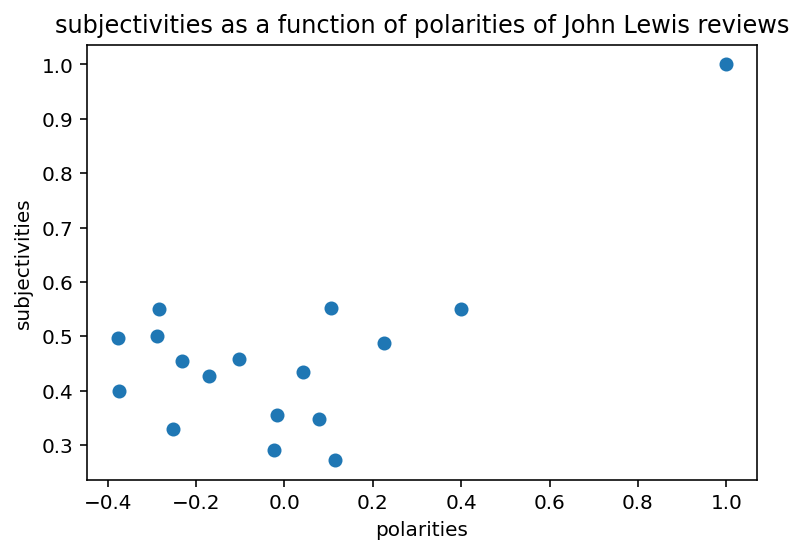

In [56]:
plt.scatter (polarities, subjectivities)
plt.xlabel ("polarities")
plt.ylabel ("subjectivities")
plt.title ("subjectivities as a function of polarities of John Lewis reviews")
plt.show

In [63]:
data ["subjectivity"] = subjectivities 
data ["polarity"] = polarities
data

,Review,Name,Date,subjectivity,polarity
0,I am currently a plusnet broadband customer wh...,"""Lucy""","""1 month ago""",0.487948,0.225551
1,Avoid. Avoid. Avoid. First John Lewis Broadban...,"""BJ""","""7 months ago""",0.290320,-0.023737
2,They've taken my money and won't refund. I can...,"""Nic""","""7 months ago""",0.348333,0.078333
3,I ordered broadband with telephone for a recen...,"""David7667""","""1 year ago""",0.434722,0.041667
4,Poor internet phone line went down a few times,"""clifford""","""1 year ago""",0.329630,-0.251852
5,I ordered broadband 5 weeks ago still not hear...,"""Ken""","""1 year ago""",0.550000,-0.283333
6,Have waited 3 weeks since I applied for John L...,"""Shirley chandler""","""1 year ago""",0.500000,-0.287879
7,If I could give zero or negative ratings I wou...,"""Moe""","""1 year ago""",0.400000,-0.375000
8,John Lewis broadband deserve a positive review...,"""Christopher J""","""2 years ago""",0.272727,0.113636
9,Avoid. Avoid. Avoid.\n\nThe worst broadband qu...,"""Mart""","""2 years ago""",0.426923,-0.171154


In [16]:
from csv import reader

outfile = open("JohnLewisReviews.txt", "w")
with open('JLAllPages.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        review = (row['Review'])
        print (review)
        line = "{}\n".format(review)
        outfile.write(review)

I am currently a plusnet broadband customer which I am happy to continue using. However as my contract has now ended and plusnet will not give me the new customer" cashback incentive I am considering switching to John Lewis who are effectively still plusnet to my knowledge. In theory if I switch to John Lewis it should be the same service but I will get the current Â£75 black Friday deal as a new customer. Has anyone used both providers before? I am presuming it would be a fairly straightforward switch over considering they are effectively the same isp."
Avoid. Avoid. Avoid. First John Lewis Broadband failed to process my order and I incurred increased charges from my old supplier. Then John Lewis Broadband never actually got around to pressing the 'on' button to connect my broadband when they were supposed to. Just when I thought I'd escaped these incompetents by moving to a new supplier when they jacked their prices up - it now turns out that John Lewis Broadband haven't actually dis

In [17]:
JL = open ("JohnLewisReviews.txt")

In [18]:
JL_text = JL.read()

In [19]:
JL_text

'I am currently a plusnet broadband customer which I am happy to continue using. However as my contract has now ended and plusnet will not give me the new customer" cashback incentive I am considering switching to John Lewis who are effectively still plusnet to my knowledge. In theory if I switch to John Lewis it should be the same service but I will get the current Â£75 black Friday deal as a new customer. Has anyone used both providers before? I am presuming it would be a fairly straightforward switch over considering they are effectively the same isp."Avoid. Avoid. Avoid. First John Lewis Broadband failed to process my order and I incurred increased charges from my old supplier. Then John Lewis Broadband never actually got around to pressing the \'on\' button to connect my broadband when they were supposed to. Just when I thought I\'d escaped these incompetents by moving to a new supplier when they jacked their prices up - it now turns out that John Lewis Broadband haven\'t actually

In [20]:
JL_token = nltk.word_tokenize(JL_text)
JL_token

['I',
 'am',
 'currently',
 'a',
 'plusnet',
 'broadband',
 'customer',
 'which',
 'I',
 'am',
 'happy',
 'to',
 'continue',
 'using',
 '.',
 'However',
 'as',
 'my',
 'contract',
 'has',
 'now',
 'ended',
 'and',
 'plusnet',
 'will',
 'not',
 'give',
 'me',
 'the',
 'new',
 'customer',
 "''",
 'cashback',
 'incentive',
 'I',
 'am',
 'considering',
 'switching',
 'to',
 'John',
 'Lewis',
 'who',
 'are',
 'effectively',
 'still',
 'plusnet',
 'to',
 'my',
 'knowledge',
 '.',
 'In',
 'theory',
 'if',
 'I',
 'switch',
 'to',
 'John',
 'Lewis',
 'it',
 'should',
 'be',
 'the',
 'same',
 'service',
 'but',
 'I',
 'will',
 'get',
 'the',
 'current',
 'Â£75',
 'black',
 'Friday',
 'deal',
 'as',
 'a',
 'new',
 'customer',
 '.',
 'Has',
 'anyone',
 'used',
 'both',
 'providers',
 'before',
 '?',
 'I',
 'am',
 'presuming',
 'it',
 'would',
 'be',
 'a',
 'fairly',
 'straightforward',
 'switch',
 'over',
 'considering',
 'they',
 'are',
 'effectively',
 'the',
 'same',
 'isp.',
 "''",
 'Avoid',
 

In [21]:
nltk.FreqDist(JL_token)

FreqDist({'.': 72, 'to': 64, 'the': 62, 'I': 43, 'and': 42, 'a': 34, 'they': 27, 'my': 24, 'it': 18, 'broadband': 17, ...})

In [22]:
norm = [word.lower()for word in JL_token if word.isalpha()]
norm

['i',
 'am',
 'currently',
 'a',
 'plusnet',
 'broadband',
 'customer',
 'which',
 'i',
 'am',
 'happy',
 'to',
 'continue',
 'using',
 'however',
 'as',
 'my',
 'contract',
 'has',
 'now',
 'ended',
 'and',
 'plusnet',
 'will',
 'not',
 'give',
 'me',
 'the',
 'new',
 'customer',
 'cashback',
 'incentive',
 'i',
 'am',
 'considering',
 'switching',
 'to',
 'john',
 'lewis',
 'who',
 'are',
 'effectively',
 'still',
 'plusnet',
 'to',
 'my',
 'knowledge',
 'in',
 'theory',
 'if',
 'i',
 'switch',
 'to',
 'john',
 'lewis',
 'it',
 'should',
 'be',
 'the',
 'same',
 'service',
 'but',
 'i',
 'will',
 'get',
 'the',
 'current',
 'black',
 'friday',
 'deal',
 'as',
 'a',
 'new',
 'customer',
 'has',
 'anyone',
 'used',
 'both',
 'providers',
 'before',
 'i',
 'am',
 'presuming',
 'it',
 'would',
 'be',
 'a',
 'fairly',
 'straightforward',
 'switch',
 'over',
 'considering',
 'they',
 'are',
 'effectively',
 'the',
 'same',
 'avoid',
 'avoid',
 'avoid',
 'first',
 'john',
 'lewis',
 'broadb

In [23]:
filtered_words = [word for word in norm if word not in stop_words]
filtered_words

['currently',
 'plusnet',
 'broadband',
 'customer',
 'happy',
 'continue',
 'using',
 'however',
 'contract',
 'ended',
 'plusnet',
 'give',
 'new',
 'customer',
 'cashback',
 'incentive',
 'considering',
 'switching',
 'john',
 'lewis',
 'effectively',
 'still',
 'plusnet',
 'knowledge',
 'theory',
 'switch',
 'john',
 'lewis',
 'service',
 'get',
 'current',
 'black',
 'friday',
 'deal',
 'new',
 'customer',
 'anyone',
 'used',
 'providers',
 'presuming',
 'would',
 'fairly',
 'straightforward',
 'switch',
 'considering',
 'effectively',
 'avoid',
 'avoid',
 'avoid',
 'first',
 'john',
 'lewis',
 'broadband',
 'failed',
 'process',
 'order',
 'incurred',
 'increased',
 'charges',
 'old',
 'supplier',
 'john',
 'lewis',
 'broadband',
 'never',
 'actually',
 'got',
 'around',
 'pressing',
 'button',
 'connect',
 'broadband',
 'supposed',
 'thought',
 'escaped',
 'incompetents',
 'moving',
 'new',
 'supplier',
 'jacked',
 'prices',
 'turns',
 'john',
 'lewis',
 'broadband',
 'actually'

In [24]:
fw_fd = nltk.FreqDist(filtered_words)
fw_fd

FreqDist({'broadband': 20, 'service': 14, 'john': 11, 'lewis': 11, 'engineer': 11, 'line': 8, 'customer': 7, 'would': 7, 'phone': 7, 'plusnet': 6, ...})

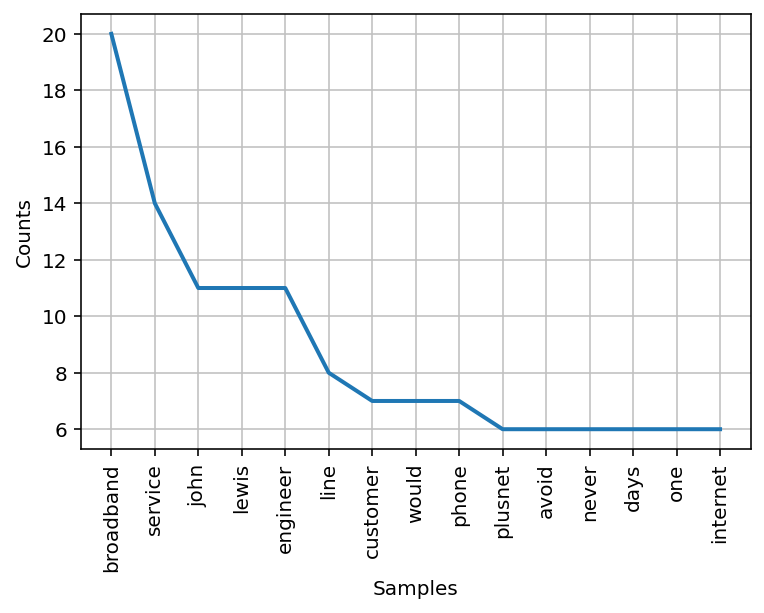

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
fw_fd.plot(15, cumulative=False)